In [1]:
pwd


'C:\\Users\\somireddy\\Downloads'

In [28]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#read the dataset
original_data = pd.read_csv("day.csv")
original_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [98]:
#
original_data.weathersit.value_counts()


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [99]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [100]:
original_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [125]:
#remove the fields which are not important

final_data = original_data.drop(['instant','dteday','atemp','casual','registered'], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [126]:
final_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


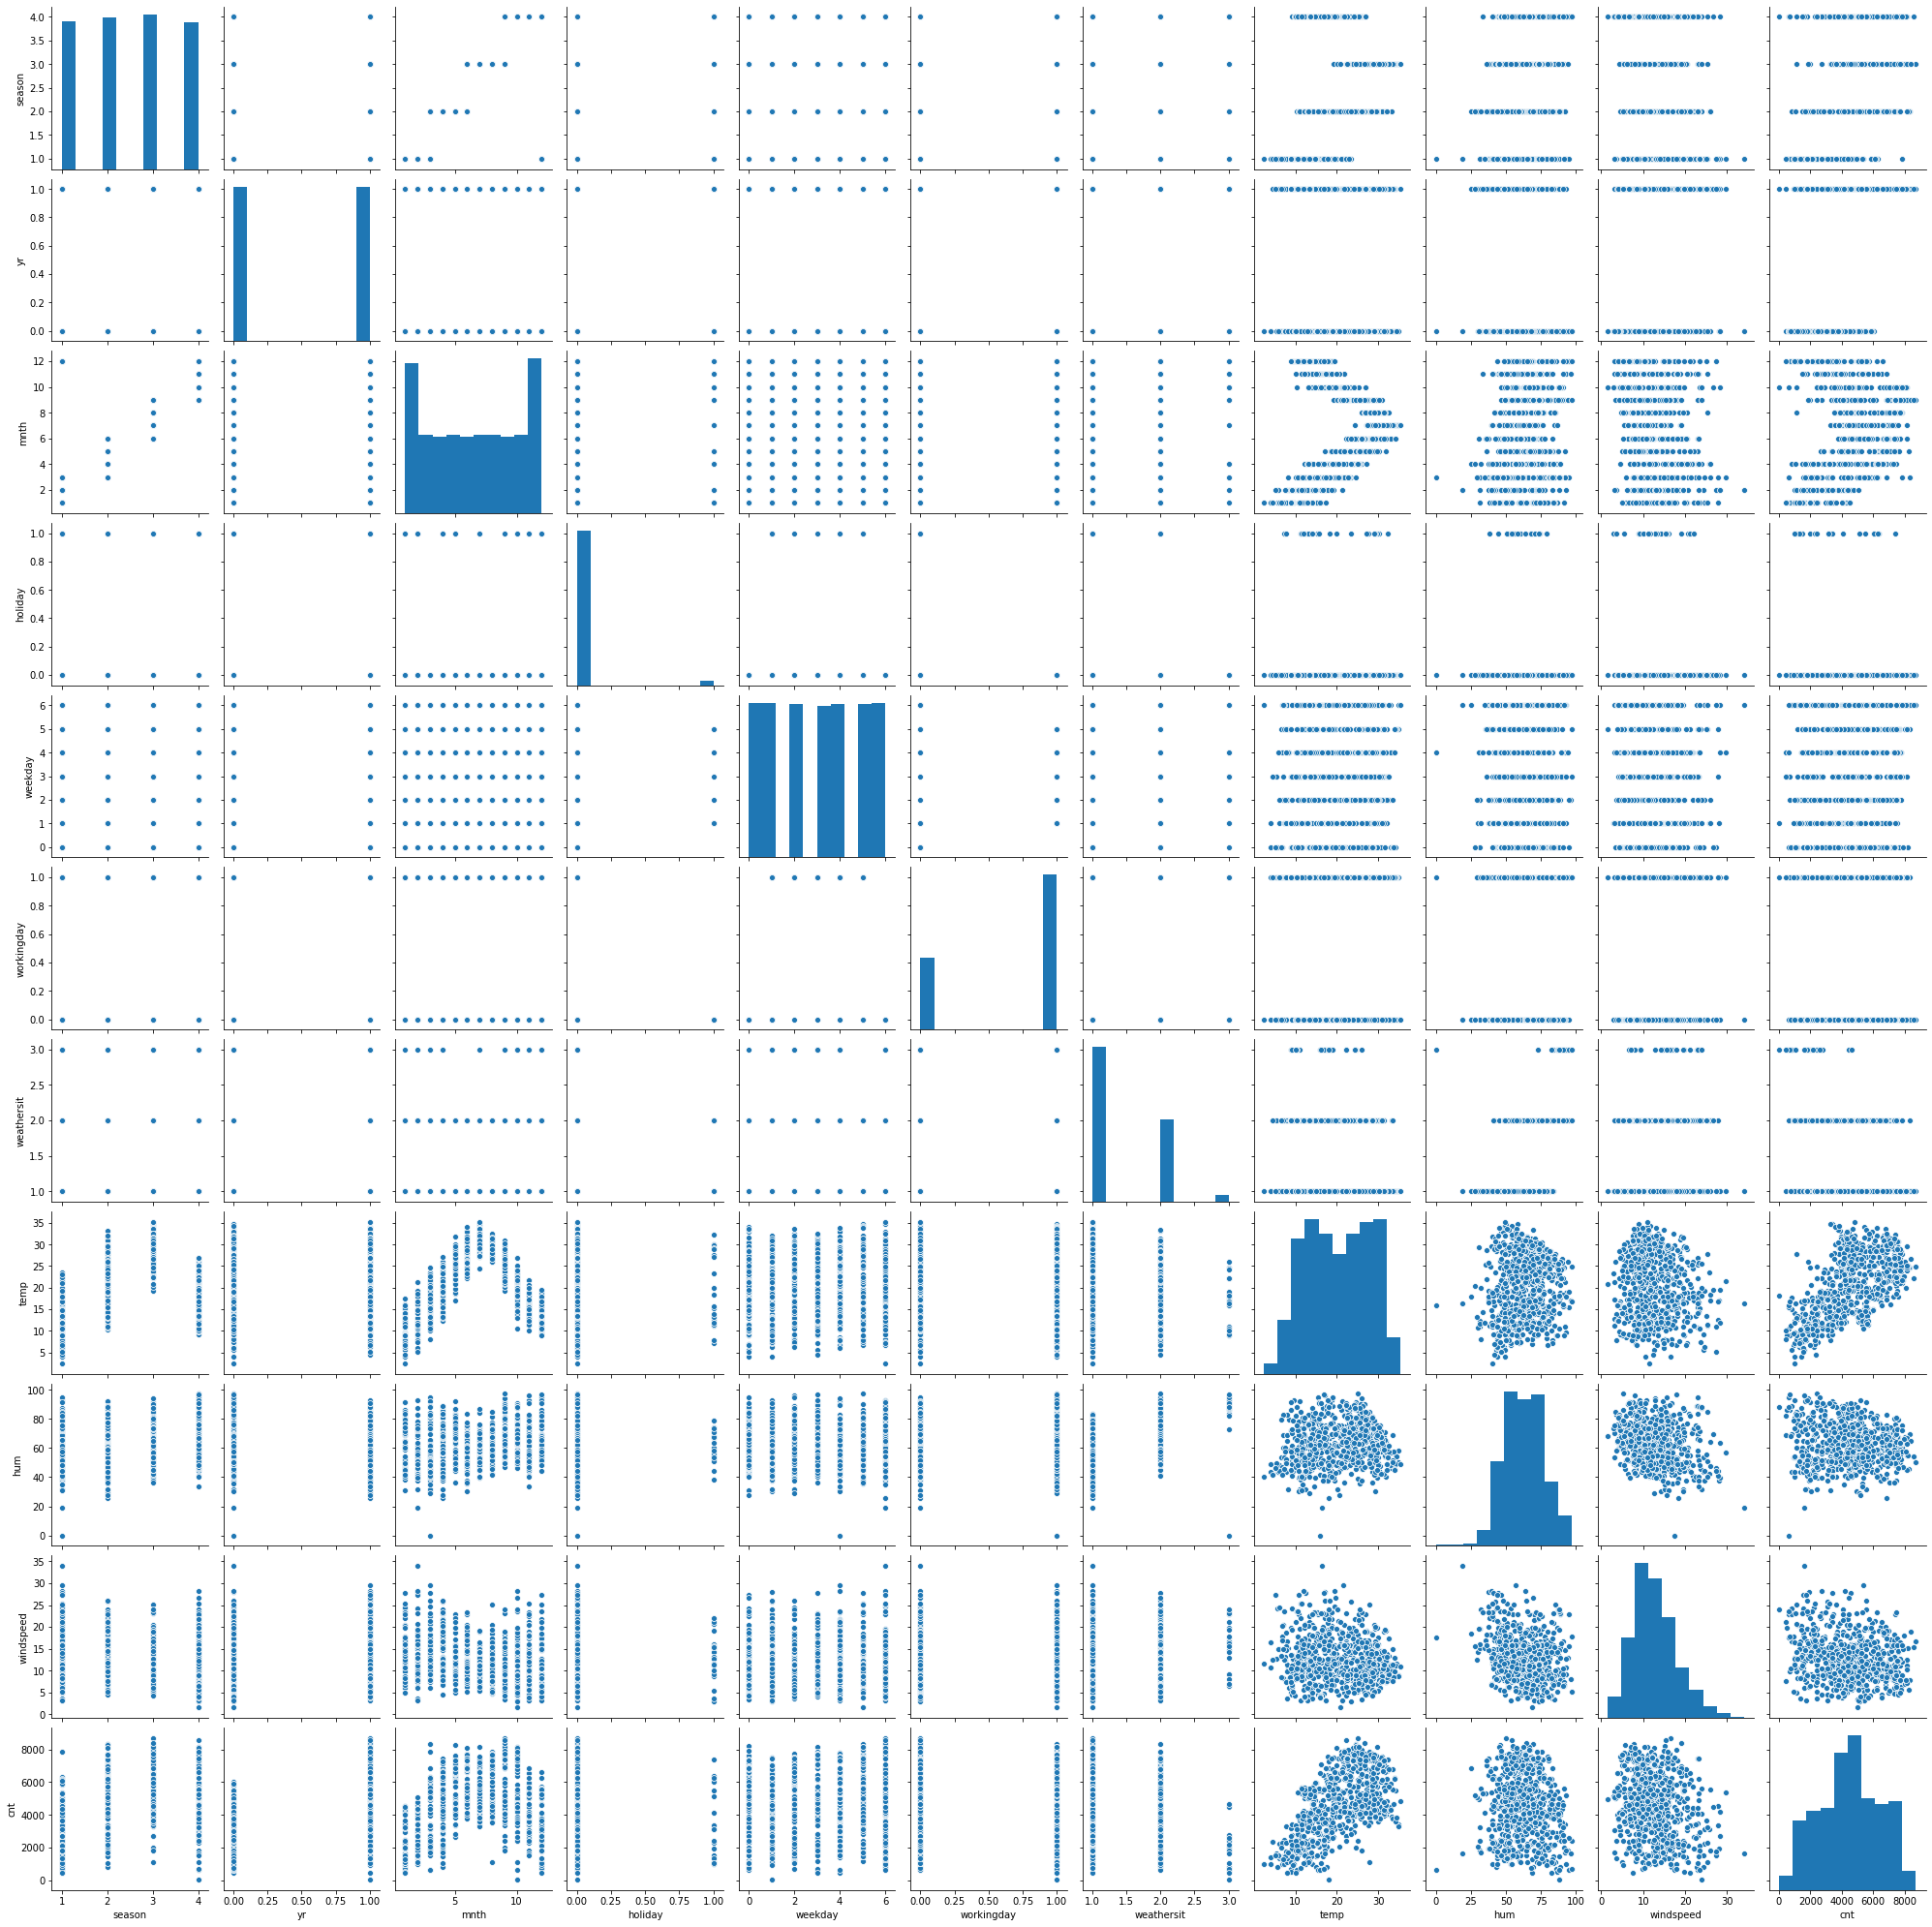

In [14]:
sns.pairplot(final_data)
plt.show()

# visualising the categorical values

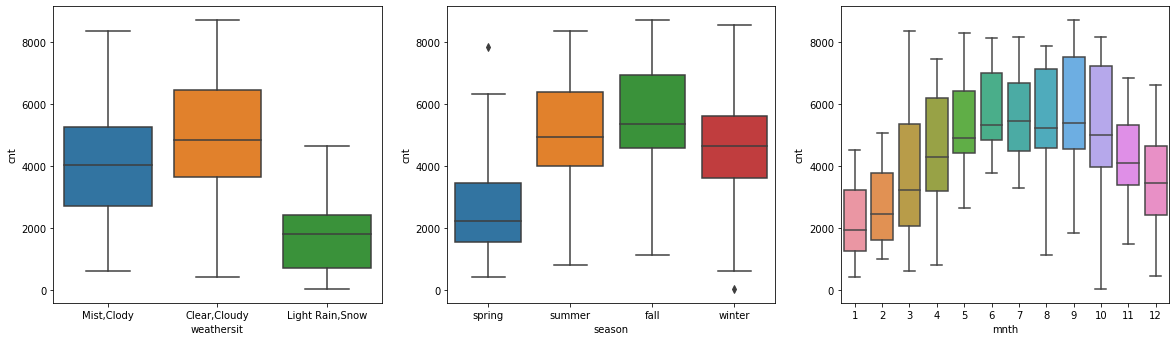

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = final_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = final_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = final_data)
plt.show()

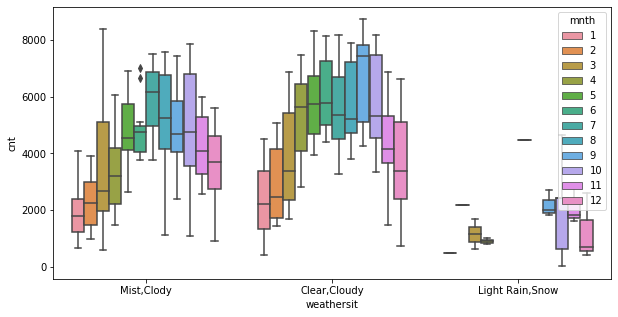

In [55]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'mnth', data = final_data)
plt.show()

In [121]:
final_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,NaN,0,1,0,NaN,0,NaN,14.110847,80.5833,10.749882,985
1,NaN,0,1,0,NaN,0,NaN,14.902598,69.6087,16.652113,801
2,NaN,0,1,0,NaN,1,NaN,8.050924,43.7273,16.636703,1349
3,NaN,0,1,0,NaN,1,NaN,8.200000,59.0435,10.739832,1562
4,NaN,0,1,0,NaN,1,NaN,9.305237,43.6957,12.522300,1600


In [104]:
final_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

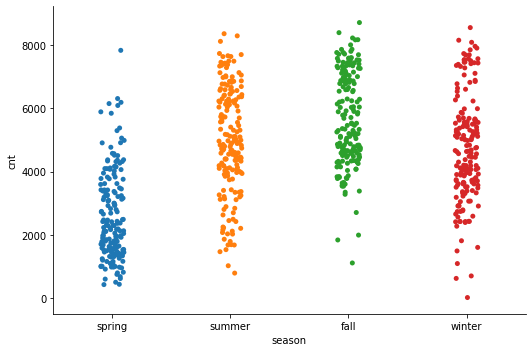

In [58]:
sns.catplot(x='season',data=final_data,y='cnt',size=5,aspect=1.5)

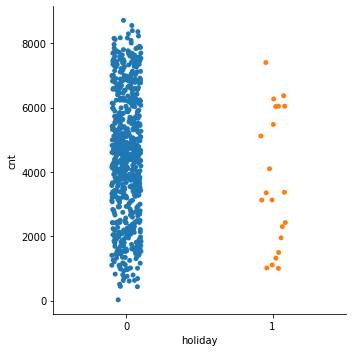

In [59]:
#holiday
final_data.holiday.value_counts()
sns.catplot(x='holiday',data=final_data,y='cnt',size=5,aspect=1)
# majority of data is for non holiday days.

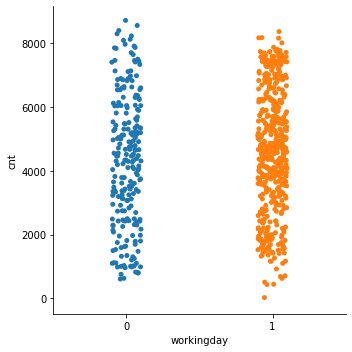

In [60]:
#holiday
final_data.workingday.value_counts()
sns.catplot(x='workingday',data=final_data,y='cnt',height=5,aspect=1)
# majority of data is for working days.

# creation of dummy varaiables

In [127]:
final_data['season'] = final_data['season'].apply(lambda x:pd.Series(x).map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

final_data


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [128]:
final_data['weathersit'] = final_data['weathersit'].apply(lambda x:pd.Series(x).map({1:'Clear,Cloudy', 2:'Mist,Clody', 3:'Light Rain,Snow', 4:'Heavy Rain'}))

In [129]:
final_data['weekday'] = final_data['weekday'].apply(lambda x:pd.Series(x).map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}))

In [130]:
final_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,"Mist,Clody",14.110847,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,"Mist,Clody",14.902598,69.6087,16.652113,801
2,spring,0,1,0,monday,1,"Clear,Cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,"Clear,Cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,"Clear,Cloudy",9.305237,43.6957,12.522300,1600


In [131]:
final_data.describe()


,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [132]:
final_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,"Mist,Clody",14.110847,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,"Mist,Clody",14.902598,69.6087,16.652113,801
2,spring,0,1,0,monday,1,"Clear,Cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,"Clear,Cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,"Clear,Cloudy",9.305237,43.6957,12.522300,1600


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [133]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)


In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
scaler = MinMaxScaler()


In [136]:
# Apply scaler() to all the columns except for dummy variables and binary value columns
num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [122]:
df_train.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,...,4,5,6,0,1,2,3,4,5,6
367,NaN,1,1,0,1,"Clear,Cloudy",0.113228,0.454701,0.695175,2236,...,0,0,0,0,0,1,0,0,0,0
648,NaN,1,10,0,1,"Clear,Cloudy",0.468352,0.477458,0.299450,7570,...,1,0,0,0,0,0,0,1,0,0
44,NaN,0,2,0,1,"Clear,Cloudy",0.443431,0.387290,0.807474,1913,...,0,0,0,0,1,0,0,0,0,0
705,NaN,1,12,0,1,"Mist,Clody",0.326094,0.787463,0.189819,5008,...,0,1,0,0,0,0,0,0,1,0
379,NaN,1,1,0,0,"Clear,Cloudy",0.133996,0.431945,0.449210,2311,...,0,0,0,1,0,0,0,0,0,0


In [137]:
df_train.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,6.549658,0.027397,0.667808,0.537414,0.649499,0.319463,4505.267123
std,0.500241,3.477090,0.163378,0.471403,0.225336,0.144219,0.168114,1958.617712
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,3.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000
50%,1.000000,7.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000
75%,1.000000,10.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


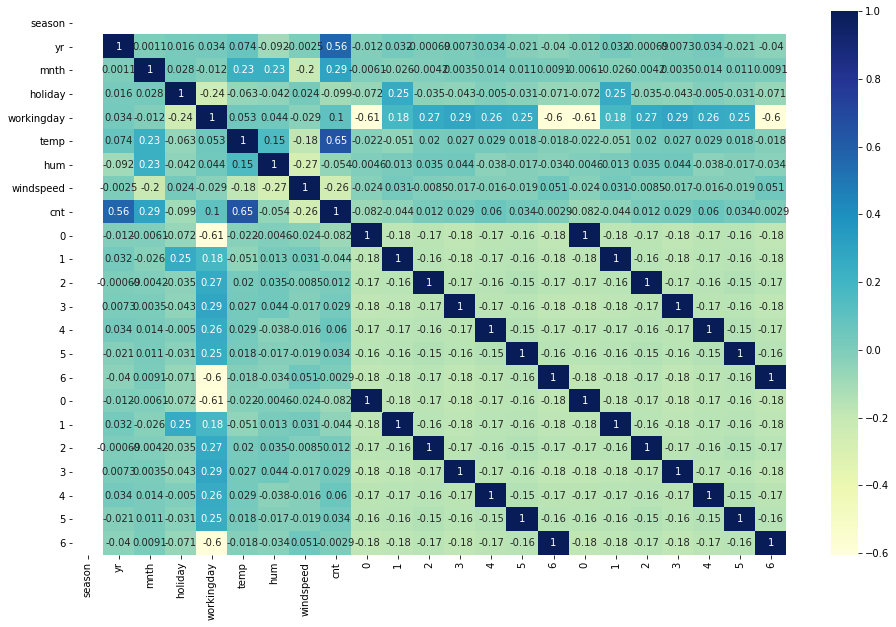

In [88]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

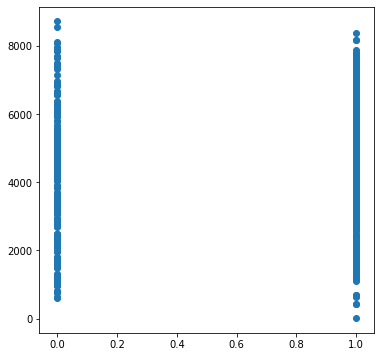

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.workingday, df_train.cnt)
plt.show()

In [48]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Check the parameters obtained

lr.params

const    3373.15493
yr       2203.84507
dtype: float64

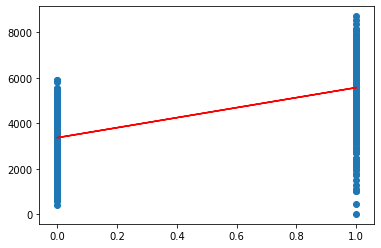

In [50]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 3373.15 + 2203.84*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [51]:
# P
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     269.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.13e-50
Time:                        20:09:39   Log-Likelihood:                -5143.6
No. Observations:                 584   AIC:                         1.029e+04
Df Residuals:                     582   BIC:                         1.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3373.1549     96.145     35.084      0.0

In [67]:
# Assign all the feature variables to X
X_train_lm = X_train[['hum','windspeed','temp','workingday']]

In [68]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         3687.083066
hum            -29.291378
windspeed      -73.162966
temp           169.495791
workingday     287.583251
dtype: float64

In [62]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           6.82e-82
Time:                        20:15:37   Log-Likelihood:                -5061.4
No. Observations:                 584   AIC:                         1.013e+04
Df Residuals:                     579   BIC:                         1.015e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3687.0831    387.332      9.519      0.0

In [69]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           6.82e-82
Time:                        20:23:32   Log-Likelihood:                -5061.4
No. Observations:                 584   AIC:                         1.013e+04
Df Residuals:                     579   BIC:                         1.015e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3687.0831    387.332      9.519      0.0

In [141]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()



lr_1.params

In [ ]:
print(lr_1.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [143]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('temp', 1,)

In [149]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,6.431507,0.034247,0.746575,0.569603,0.635933,0.315127,4518.965753
std,0.498699,3.350569,0.182488,0.436469,0.238088,0.156357,0.161524,1849.283281
min,0.000000,1.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,506.000000
25%,0.000000,4.000000,0.000000,0.250000,0.359075,0.534457,0.196160,3422.750000
50%,0.000000,6.000000,0.000000,1.000000,0.560248,0.614856,0.306383,4445.500000
75%,1.000000,9.000000,0.000000,1.000000,0.801929,0.730570,0.411976,5671.750000
max,1.000000,12.000000,1.000000,1.000000,0.984424,1.002146,0.800793,8395.000000


In [ ]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [150]:
y_test = df_test.pop('cnt')
X_test = df_test

In [151]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [152]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["temp","hum","yr"], axis = 1)